# Growth Mechanism with Details

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import glob, re

import sys
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import colors

sys.path.append('../../src')
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.RHEED.Analysis_umich import fit_curves, analyze_txt_rheed, plot_activation_energy

if not os.path.isdir('Saved_data'): os.mkdir('Saved_data')
set_style("printing")
random_seed(seed=42)


printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


./Datasets/8-23-2023/smallarea data\650_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '650', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


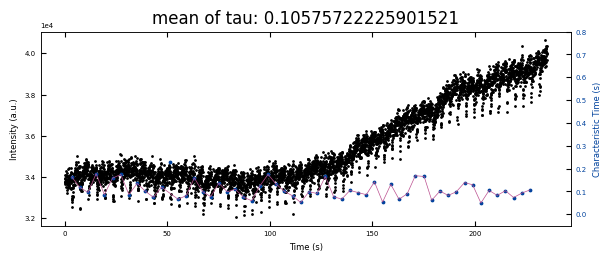

./Datasets/8-23-2023/smallarea data\670_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '670', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


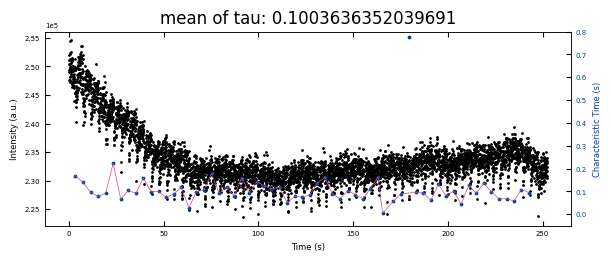

./Datasets/8-23-2023/smallarea data\690_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '690', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


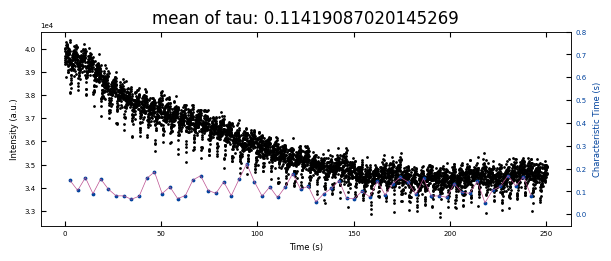

./Datasets/8-23-2023/smallarea data\710_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '710', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


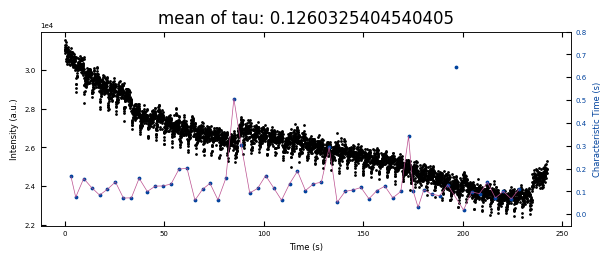

In [7]:
detect_param={'step_size':3, 'prominence':10}
laser_freq = 0.25
camera_freq = 1000/50
viz_curves=False
viz_fittings=False
viz_ab=False

tau_list, temp_list = [], []
for file in glob.glob('./Datasets/8-23-2023/smallarea data/*.txt'):

    if os.path.isfile(file):
        print(file, re.split(r'[_ \\]+', file))

        temp = int(re.split(r'[_ \\]+', file)[2][:3])
        parameters_all, x_list_all, info, tau = analyze_txt_rheed(file, camera_freq, laser_freq, detect_param, viz_curves, viz_fittings, viz_ab, n_std=3)

        temp_list.append(temp)
        tau_list.append(tau)

In [8]:
print(temp_list)
print(tau_list)

[650, 670, 690, 710]
[0.10575722225901521, 0.1003636352039691, 0.11419087020145269, 0.1260325404540405]


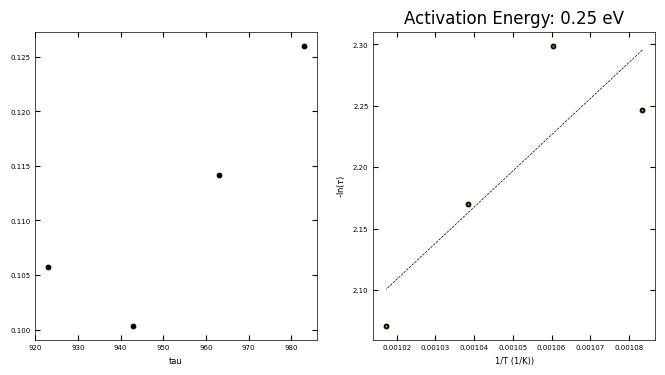

In [9]:
tau_mean_list = [np.mean(t_list) for t_list in tau_list]

fig, axes = plt.subplots(1, 2, figsize=(8,4))

T = np.array(temp_list) + 273
tau_mean = np.array(tau_mean_list)

axes[0].scatter(T, tau_mean, color='k', s=10)
axes[0].set_xlabel('T')
axes[0].set_xlabel('tau')

x = 1/(T)
y = -np.log(tau_mean)
m, b = np.polyfit(x, y, 1)

axes[1].scatter(x, y, color='k', s=10)
axes[1].plot(x, y, 'yo', x, m*x+b, '--k')
axes[1].set_xlabel('1/T (1/K))')
axes[1].set_ylabel(r'-ln($\tau$)')
axes[1].set_title('Activation Energy: ' + str(round(m*8.617e-5, 2)) + ' eV')
plt.show()

./Datasets/8-23-2023/smallarea data\650_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '650', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


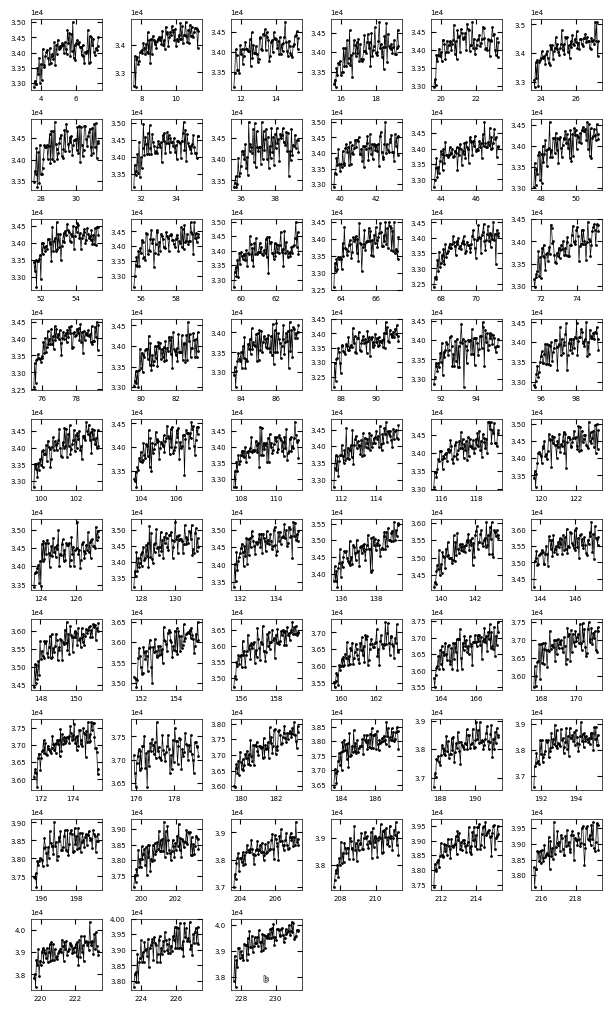

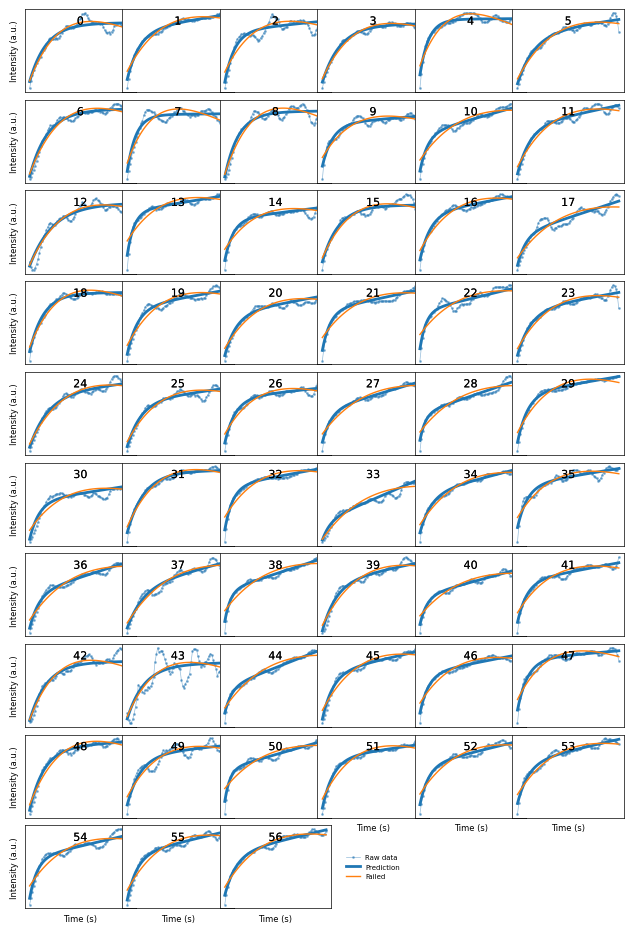

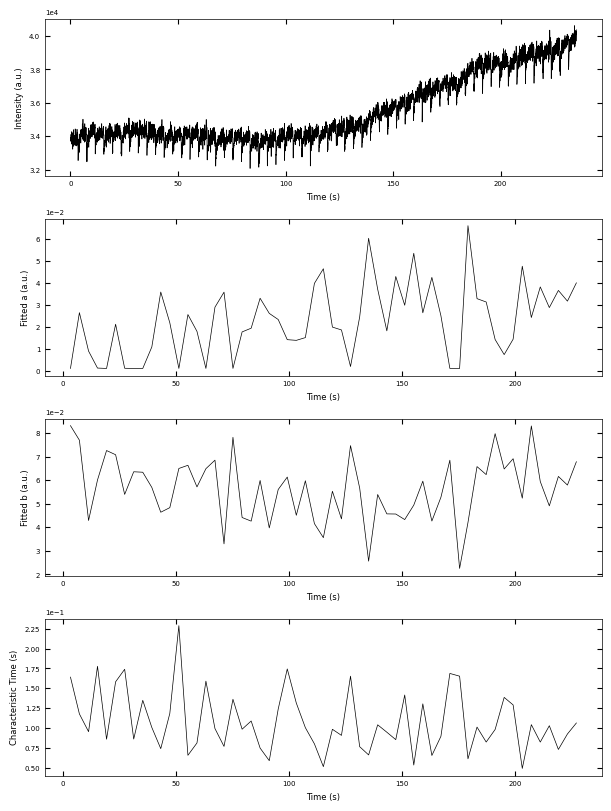

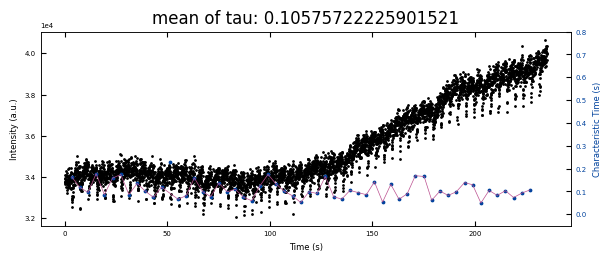

./Datasets/8-23-2023/smallarea data\670_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '670', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


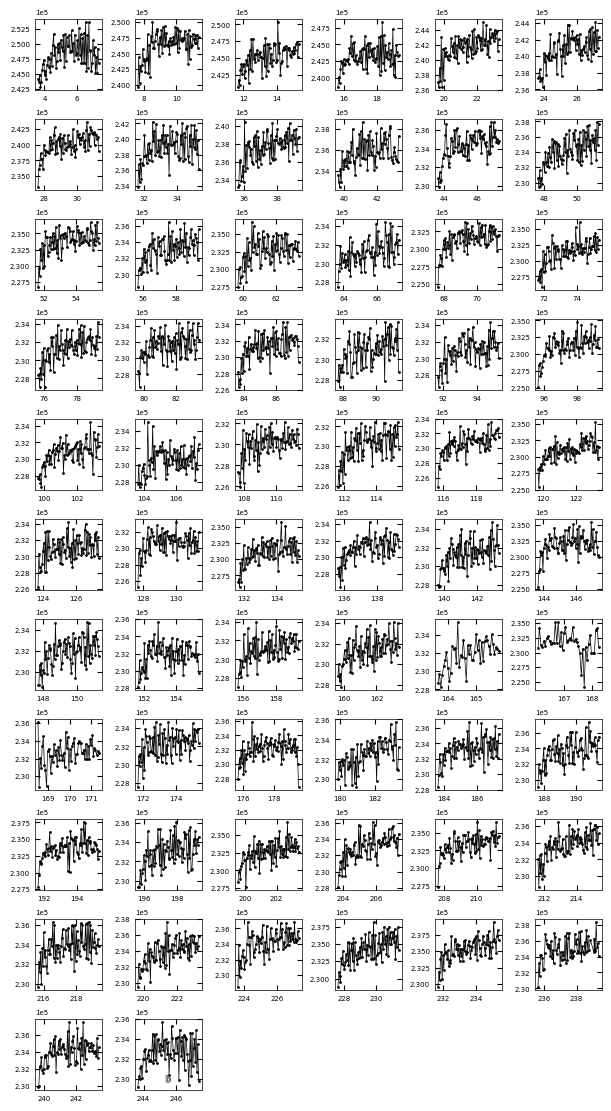

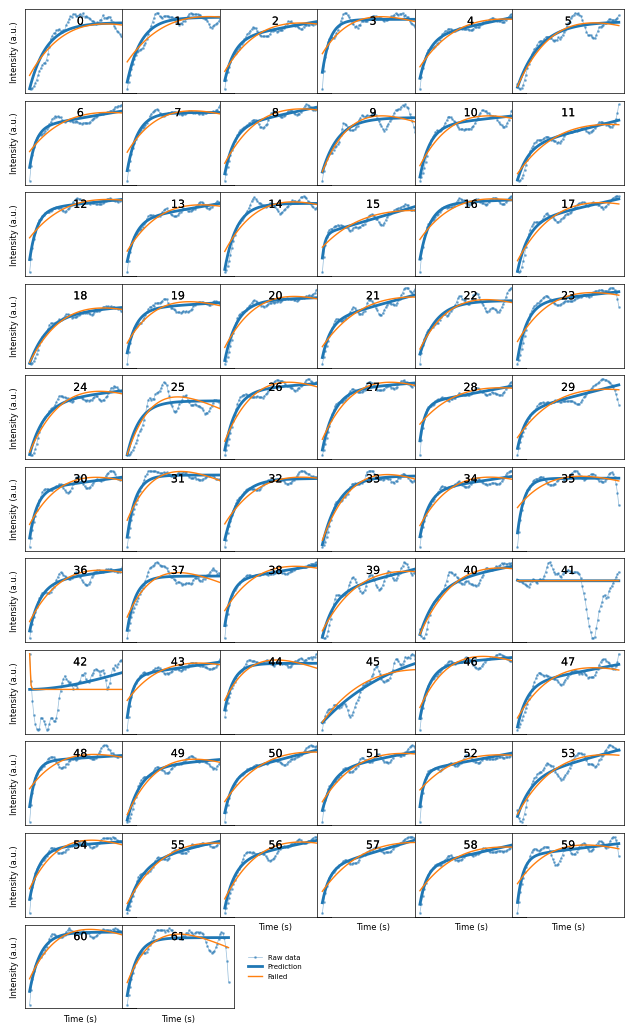

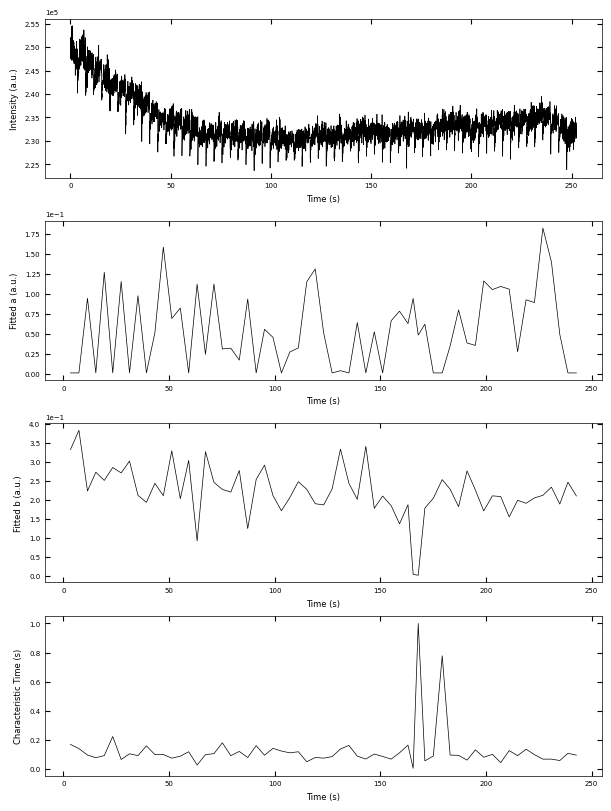

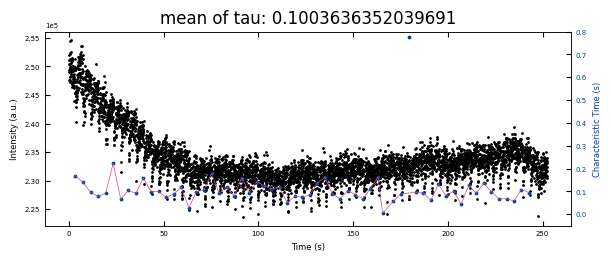

./Datasets/8-23-2023/smallarea data\690_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '690', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


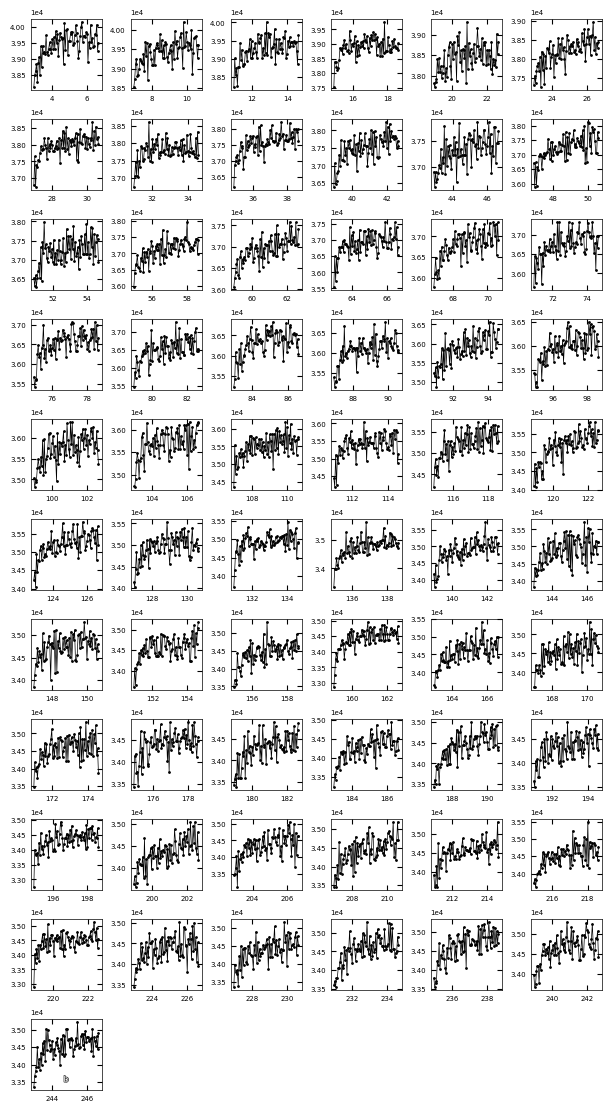

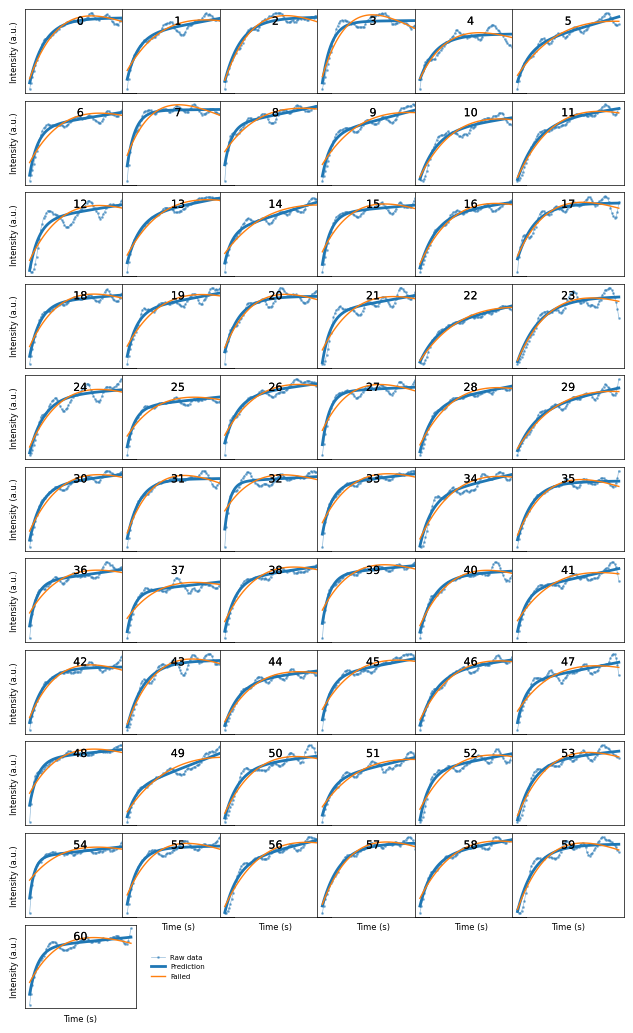

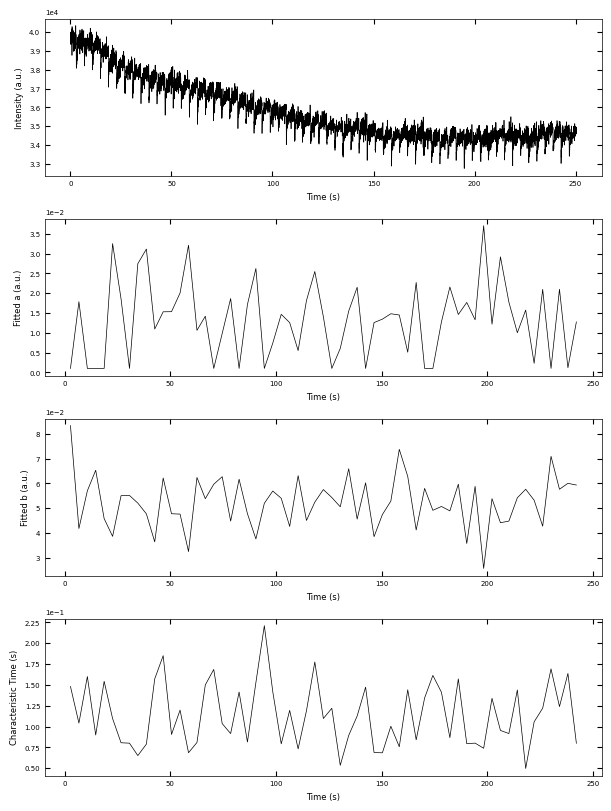

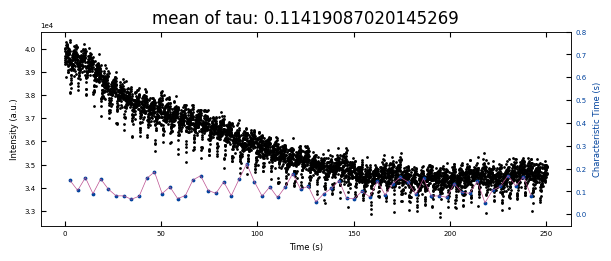

./Datasets/8-23-2023/smallarea data\710_0.25Hz_50ms_summed_smallarea.txt ['./Datasets/8-23-2023/smallarea', 'data', '710', '0.25Hz', '50ms', 'summed', 'smallarea.txt']


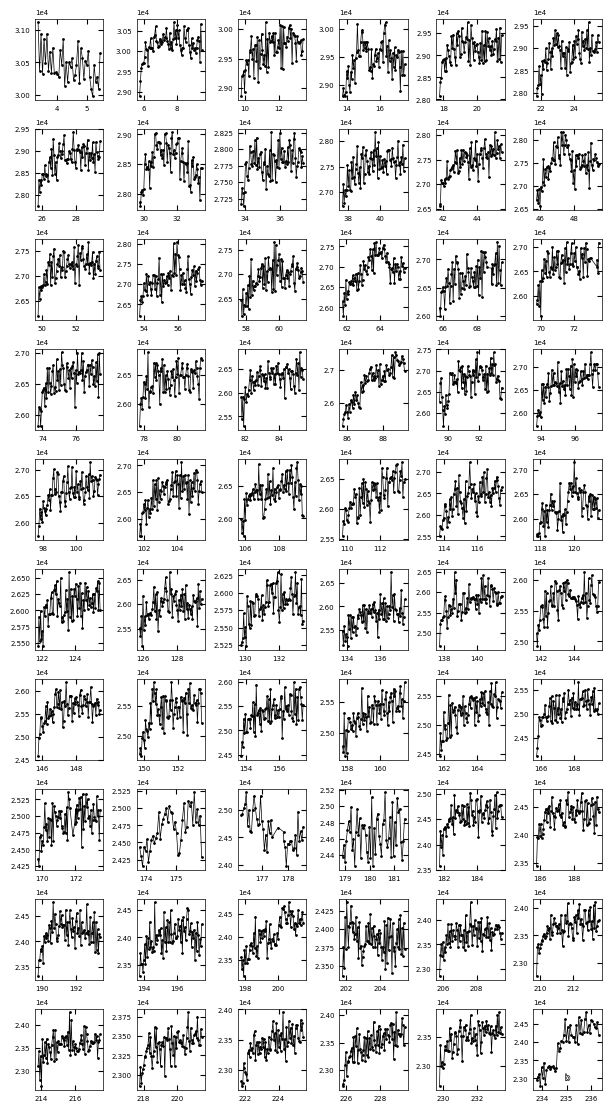

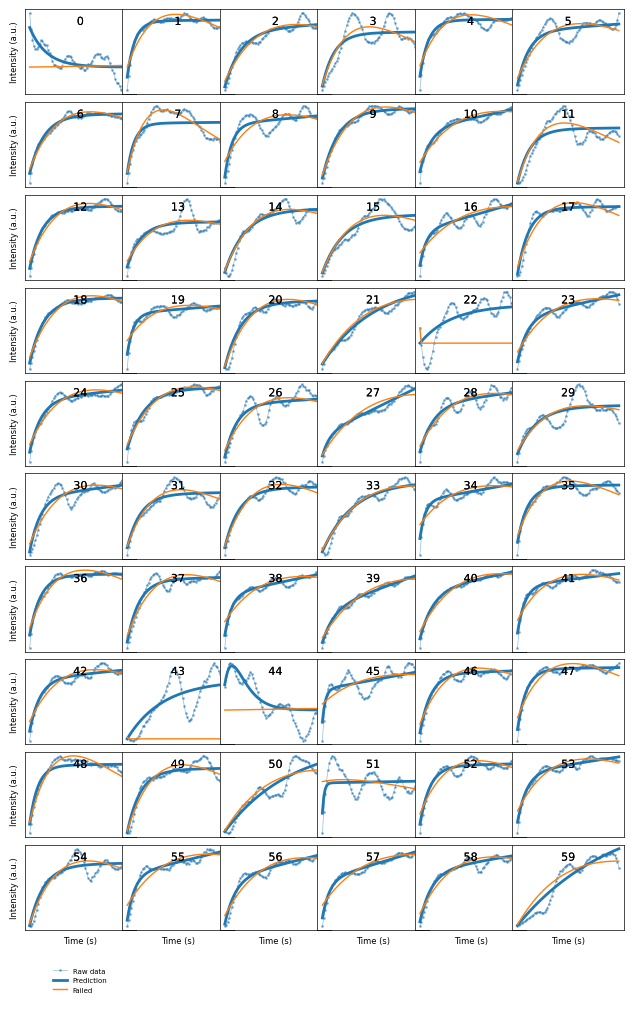

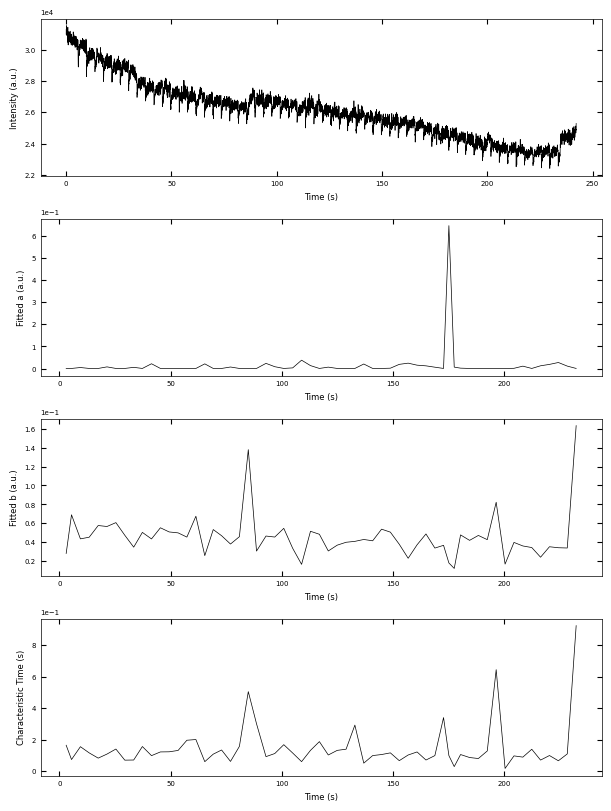

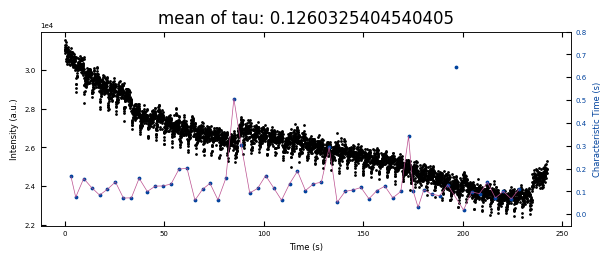

In [10]:
detect_param={'step_size':3, 'prominence':10}
laser_freq = 0.25
camera_freq = 1000/50
viz_curves=True
viz_fittings=True
viz_ab=True

tau_list, temp_list = [], []
for file in glob.glob('./Datasets/8-23-2023/smallarea data/*.txt'):

    if os.path.isfile(file):
        print(file, re.split(r'[_ \\]+', file))

        temp = int(re.split(r'[_ \\]+', file)[2][:3])
        parameters_all, x_list_all, info, tau = analyze_txt_rheed(file, camera_freq, laser_freq, detect_param, viz_curves, viz_fittings, viz_ab, n_std=3)

        temp_list.append(temp)
        tau_list.append(tau)